# 实现逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris=datasets.load_iris()

In [2]:
x=iris.data
y=iris.target

In [3]:
x=x[y<2,:2]
y=y[y<2]

In [4]:
x.shape

(100, 2)

In [5]:
y.shape

(100,)

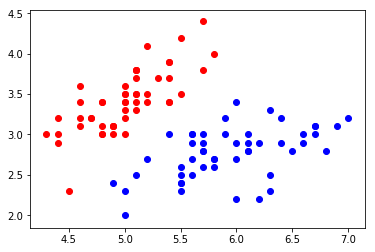

In [6]:
plt.scatter(x[y==0,0],x[y==0,1],color='r')
plt.scatter(x[y==1,0],x[y==1,1],color='b')
plt.show()

# 使用逻辑回归

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=666)

In [8]:
from playML.LogisticRegression import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LinearRegression

In [9]:
log_reg.score(x_test,y_test)

1.0

In [10]:
log_reg.predict_proba(x_test)

array([0.93292947, 0.98717455, 0.15541379, 0.18370292, 0.03909442,
       0.01972689, 0.05214631, 0.99683149, 0.98092348, 0.75469962,
       0.0473811 , 0.00362352, 0.27122595, 0.03909442, 0.84902103,
       0.80627393, 0.83574223, 0.33477608, 0.06921637, 0.21582553,
       0.0240109 , 0.1836441 , 0.98092348, 0.98947619, 0.08342411])

In [11]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

In [12]:
log_reg.predict(x_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

# 决策边界

In [13]:
def x2(x1):
    return (-log_reg.coef_[0]*x1-log_reg.intercept_)/log_reg.coef_[1]

In [14]:
x1_plot=np.linspace(4,8,1000)
x2_plot=x2(x1_plot)

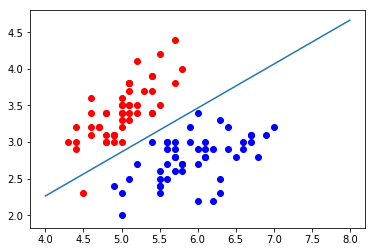

In [15]:
plt.plot(x1_plot,x2_plot)
plt.scatter(x[y==0,0],x[y==0,1],color='r')
plt.scatter(x[y==1,0],x[y==1,1],color='b')
plt.show()

In [20]:
def plot_descision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100))
    )
    x_new=np.c_[x0.ravel(),x1.ravel()]
    
    y_predict=model.predict(x_new)
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


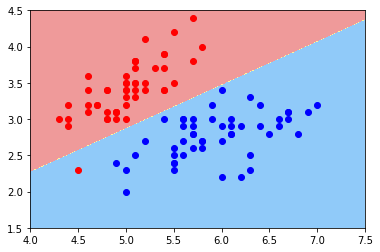

In [22]:
plot_descision_boundary(log_reg,axis=[4,7.5,1.5,4.5])
plt.scatter(x[y==0,0],x[y==0,1],color='r')
plt.scatter(x[y==1,0],x[y==1,1],color='b')
plt.show()

# kNN的决策边界

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
knn_clf.score(x_test,y_test)

1.0

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


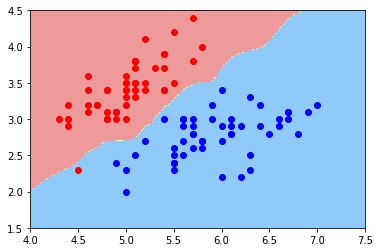

In [25]:
plot_descision_boundary(knn_clf,axis=[4,7.5,1.5,4.5])
plt.scatter(x[y==0,0],x[y==0,1],color='r')
plt.scatter(x[y==1,0],x[y==1,1],color='b')
plt.show()

In [26]:
knn_clf_all=KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2],iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


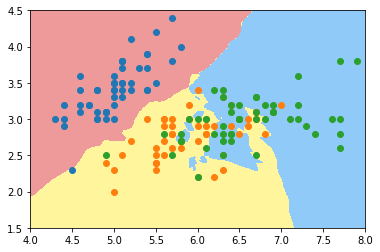

In [28]:
plot_descision_boundary(knn_clf_all,axis=[4,8,1.5,4.5])
plt.scatter(iris.data[iris.target==0,0],iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0],iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0],iris.data[iris.target==2,1])
plt.show()

In [29]:
knn_clf_all=KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2],iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


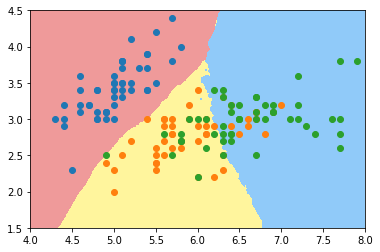

In [30]:
plot_descision_boundary(knn_clf_all,axis=[4,8,1.5,4.5])
plt.scatter(iris.data[iris.target==0,0],iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0],iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0],iris.data[iris.target==2,1])
plt.show()